<a href="https://colab.research.google.com/github/seoho0529/TensorFlow/blob/main/tfc17colorimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CIFAR-10 dataset
# The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
# There are 50000 training images and 10000 test images.
# airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Flatten, Dense
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import cifar10



(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


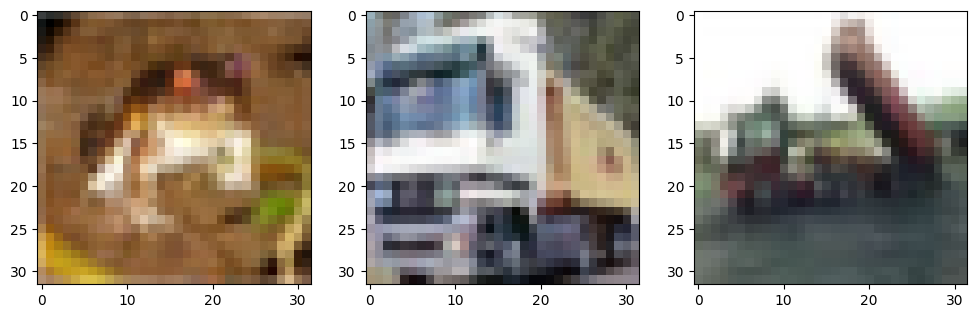

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)   # (50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
print(x_train[0])  # [[[ 59  62  63] [ 43  46  45] [ 50  48  43]...
print(y_train[0])  # 6

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(x_train[0])

plt.subplot(1, 3, 2)
plt.imshow(x_train[1])

plt.subplot(1, 3, 3)
plt.imshow(x_train[2])
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

from keras.utils import to_categorical
NUM_CLASSES = 10  # 범주가 10개니까
y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)
print(x_train[0, 12, 13, 1])  #  인덱스 0의 이미지에서 (12행 13열) 위치에 해당하는 green channel 값

0.5882353


In [ ]:
# CNN 없이 모델 작성
# model = Sequential([
#     Dense(units=256, activation='relu', input_shape=(32,32,3)),  # 칼라니까 (32,32,3)  흑백은(28,28,1)
#     Flatten(),
#     Dense(units=128, activation='relu'),
#     Dense(units=NUM_CLASSES, activation='softmax')
# ])
# print(model.summary())

# Functional API 사용
# input_layer = Input((32,32,3))  # 괄호 2개인 이유 : 튜플형태로 지정하기 위해, (32,32,3)은 입력데이터의 형태를 의미-> 이렇게 괄호 하나만 하면 Functional에 잘못된 방식으로 인식됨
# net = Flatten()(input_layer)
# net = Dense(units=256, activation='relu')(net)
# net = Dense(units=256, activation='relu')(net)
# output_layer = Dense(units=NUM_CLASSES, activation='softmax')(net)
# model = Model(input_layer, output_layer)
# print(model.summary())


# CNN 레이어를 Dense 위에 추가
from keras.layers import Conv2D,  MaxPool2D,Activation, ReLU, LeakyReLU, BatchNormalization
# BatchNormalization : 활성화 함수의 값이나 출력값을 정규화함. 학습속도를 개선, 정규화를 하기 때문에 가중치 초기값 선택 의존성이 적어진다. -> 과적합 방지
input_layer = Input((32,32,3))
net = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(input_layer)
net = BatchNormalization()(net)
net = LeakyReLU()(net)
net = MaxPool2D(pool_size=(2,2))(net)

net = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(net)
net = BatchNormalization()(net)
net = LeakyReLU()(net)
net = MaxPool2D(pool_size=(2,2))(net)

net = Flatten()(net)

net = Dense(units=256)(net)
net = BatchNormalization()(net)
net = LeakyReLU()(net)
net = Dense(units=128)(net)
net = BatchNormalization()(net)
net = LeakyReLU()(net)


output_layer = Dense(units=NUM_CLASSES, activation='softmax')(net)
model = Model(input_layer, output_layer)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928 

In [ ]:
# train
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10, shuffle=True, verbose=2)

print('test acc : %.4f'%(model.evaluate(x_test, y_test, verbose=0, batch_size=128)[1]))   # 이때, 얘네들은 값을 가지고 있기 때문에 계속 실행해주면 학습이 되서 옳은 결과를 얻을 수 없음(주피터에서)
print('test loss : %.4f'%(model.evaluate(x_test, y_test, verbose=0, batch_size=128)[0]))  # 전체 수행해줘야함

CLassess = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

Epoch 1/10
391/391 - 17s - loss: 1.2855 - accuracy: 0.5406 - 17s/epoch - 44ms/step
Epoch 2/10
391/391 - 6s - loss: 0.9377 - accuracy: 0.6689 - 6s/epoch - 16ms/step
Epoch 3/10
391/391 - 4s - loss: 0.8089 - accuracy: 0.7138 - 4s/epoch - 10ms/step
Epoch 4/10
391/391 - 4s - loss: 0.7040 - accuracy: 0.7503 - 4s/epoch - 11ms/step
Epoch 5/10
391/391 - 5s - loss: 0.6208 - accuracy: 0.7805 - 5s/epoch - 13ms/step
Epoch 6/10
391/391 - 4s - loss: 0.5437 - accuracy: 0.8092 - 4s/epoch - 11ms/step
Epoch 7/10
391/391 - 4s - loss: 0.4775 - accuracy: 0.8307 - 4s/epoch - 10ms/step
Epoch 8/10
391/391 - 4s - loss: 0.4148 - accuracy: 0.8528 - 4s/epoch - 12ms/step
Epoch 9/10
391/391 - 5s - loss: 0.3616 - accuracy: 0.8704 - 5s/epoch - 14ms/step
Epoch 10/10
391/391 - 5s - loss: 0.3115 - accuracy: 0.8875 - 5s/epoch - 13ms/step
test acc : 0.6708
test loss : 1.3323


In [ ]:
# 예측
pred = model.predict(x_test[:10])
pred_single = CLassess[np.argmax(pred, axis=-1)]
actual_single = CLassess[np.argmax(y_test[:10], axis=-1)]
print('예측값 :', pred_single)
print('예측값 :', actual_single)
print('분류 실패 수 :', (pred_single != actual_single).sum())

1/1 [==============================] - 0s 59ms/step
예측값 : ['dog' 'ship' 'truck' 'airplane' 'frog' 'frog' 'automobile' 'frog' 'cat'
 'automobile']
예측값 : ['cat' 'ship' 'ship' 'airplane' 'frog' 'frog' 'automobile' 'frog' 'cat'
 'automobile']
분류 실패 수 : 2


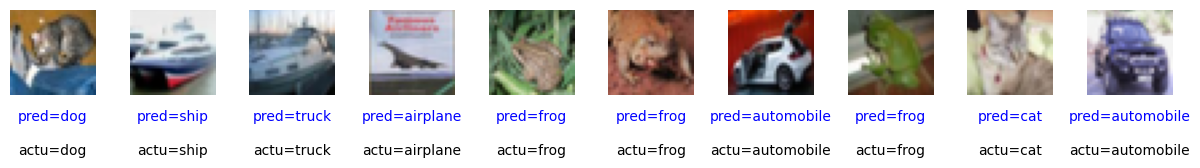

In [ ]:
# 시각화
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # hspace : 그림과 그림사이 간격,

for i, idx in enumerate(range(len(x_test[:10]))):
  img = x_test[idx]
  ax = fig.add_subplot(1, len(x_test[:10]), i+1)
  ax.axis('off')
  ax.text(0.5, -0.3, 'pred=' + str(pred_single[idx]), fontdict={'fontsize':10, 'color':'blue'}, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'actu=' + str(pred_single[idx]), fontdict={'fontsize':10}, ha='center', transform=ax.transAxes)
  ax.imshow(img)
plt.show()